# Experimental Template
The following notebook acts as a template for experiments. The one step not included is the data cleaning phase!
<br />
<br />
I have put FIXME tags next to the areas that you will need to address.
<br />
<br />
If you are curious to know more about how the code works, look at the `helper_functions.py` and `resnet.py` files.

## Env setup
You can either create your own environment and install the packages manually, or use the following commands to create a conda environment with the required packages.
### BIE Environment:
`conda create --name BIE_conversion`
</br>
`conda activate BIE_conversion`
</br>
`conda env update --name BIE_conversion --file ./conda_envs/BIE_conversion.yml`
### Keras Environment:
`conda create --name keras_gpu`
</br>
`conda activate keras_gpu`
</br>
`conda env update --name keras_gpu --file ./conda_envs/keras_gpu.yml`

## Imports and Setup

In [1]:
from helper_functions import pd, os, shutil
from helper_functions import convert_samples_to_binary, get_column_data_types, print_library_versions, add_id_column, order_columns_by_correlation, organize_photos_in_folders

### Try to get library versions matching the following:

In [2]:
print_library_versions()

pandas version:           1.4.1
matplotlib version:       3.5.1
numpy version:            1.18.5
bitstring version:        3.1.9
joblib version:           1.1.0
PIL version:              8.2.0


## Data Loading and Cleaning

In [3]:
# FIXME - update the filename to point to your dataset
filename = '/mnt/sda1/iris.csv'
df = pd.read_csv(filename)

### Spend some time familiarizing yourself with your dataset. Here are some basic commands

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# NOTE:
The following code segments are specific to my dataset. This is where you will need to perform your own data cleaning!!!
<br />
<br />
This will be the most difficult/time intensive aspect! Everything else will be plug and play!

In [6]:
# FIXME - change the value 'species' to match the 'y' value of your dataset
# This function will give your dataframe an 'id' column which will be used to identify the samples in the dataset
# The 'id' column will be used to name the photos of the samples
classification_id = 'Species'
df = add_id_column(df, classification_id)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1-setosa,5.1,3.5,1.4,0.2,Iris-setosa
1,2-setosa,4.9,3.0,1.4,0.2,Iris-setosa
2,3-setosa,4.7,3.2,1.3,0.2,Iris-setosa
3,4-setosa,4.6,3.1,1.5,0.2,Iris-setosa
4,5-setosa,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,46-virginica,6.7,3.0,5.2,2.3,Iris-virginica
146,47-virginica,6.3,2.5,5.0,1.9,Iris-virginica
147,48-virginica,6.5,3.0,5.2,2.0,Iris-virginica
148,49-virginica,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# FIXME - Perform any data cleaning or preprocessing steps here!
# For example, if you have missing values, you can fill them in with the mean value of the column or drop them
# Look at our past work for examples of how to do this
# Kaggle is another good resource

In [8]:
# FIXME - get the correct values in the x and Y variables for your dataset
# As long as you have the correct value in `classification_id` from earlier, you shouldn't need any changes here unless there is another column you want to drop
# For instance, if you have an overfit feature such as a timestamp, you can drop it here
x = df.drop([classification_id, 'Id'], axis=1)
Y = df[classification_id]
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (150, 4)
Y (150,)
This value should be True: True


## Image Generation

In [9]:
# FIXME - update `image_directory`` to point to a directory where you want the images to be saved. 
# Change any other constants you want to change
image_directory = "/mnt/sda1/image-results-iris"
feature_types = get_column_data_types(x)
# Precision: the number of binary digits to use for each feature (use a power of 2)
precision = 64
# one: the value to use for a 1 in the binary representation (128 is a dark pixel)
one = 128
zero = 0
# num_jobs: the number of jobs to run in parallel (-1 means use all available cores)
n_jobs = -1
# For feature_types, 0 = float, 1 = int, 2 = bool
# Notice mine are all 0's because I only have float values in my dataset, you may have different values
print(feature_types)

[0, 0, 0, 0]


In [10]:
convert_samples_to_binary(x, df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

## Place Folders into the Correct Categories

In [11]:
organize_photos_in_folders(image_directory, Y)

150
{'setosa': 50, 'versicolor': 50, 'virginica': 50}


In [ ]:
#FIXME Upload your photos to the Google Drive Data Folder!

## Train ResNet50

### Once experiments are running, view the live updates on TensorBoard
Run the command `tensorboard --logdir=[your log directory]` in the terminal. 
<br />
<br />
Then, open a browser and navigate to `localhost:6006`.
<br />
<br />
![TensorBoard](./tensorboard.png)

In [1]:
from resnet import print_dl_versions, train_resnet_model_k_fold, evaluate_on_test_data, plot_metrics

2023-03-07 13:15:33.608251: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# FIXME - update the values below to match your dataset
# Multiple of 2 such that it is greater than or equal to the number of features you have
img_size = 64
target_size = (img_size,img_size)
# Number of classification types (classes) in your dataset
num_classes = 3
# Number of samples to run through the model before updating the weights
# Higher batch size means more memory is required and training will be faster. Maybe use 64 for larger datasets
batch_size = 32
# Number of times to run through training a model
# Depending on the size of your dataset, you may want to increase/decrease this number
num_folds = 5
# Number of times to run through the entire dataset
number_of_epochs = 100

In [ ]:
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

In [9]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.006600152849568985, 'acc': 0.9983333349227905, 'f1_m': 0.9979166626930237, 'precision_m': 0.9979166626930237, 'recall_m': 0.9979166626930237, 'auc_5': 1.0, 'false_negatives_5': 0.0, 'false_positives_5': 0.0, 'true_negatives_5': 240.0, 'true_positives_5': 120.0, 'mean_absolute_error': 0.003653079250943847, 'mean_squared_error': 0.00092650216973027, 'val_loss': 0.37048304416239264, 'val_acc': 0.9066666603088379, 'val_f1_m': 0.9066666245460511, 'val_precision_m': 0.9066666603088379, 'val_recall_m': 0.9066666603088379, 'val_auc_5': 1.0, 'val_false_negatives_5': 0.0, 'val_false_positives_5': 0.0, 'val_true_negatives_5': 60.0, 'val_true_positives_5': 30.0, 'val_mean_absolute_error': 0.06671324791386724, 'val_mean_squared_error': 0.055582360707921906, 'lr': 0.002205399941021824}


In [10]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.006023820023983717, 'acc': 1.0, 'f1_m': 1.0, 'precision_m': 1.0, 'recall_m': 1.0, 'auc_5': 1.0, 'false_negatives_5': 0.0, 'false_positives_5': 0.0, 'true_negatives_5': 240.0, 'true_positives_5': 120.0, 'mean_absolute_error': 0.003057684050872922, 'mean_squared_error': 0.0012675473699346185, 'val_loss': 0.007461799308657646, 'val_acc': 1.0, 'val_f1_m': 1.0, 'val_precision_m': 1.0, 'val_recall_m': 1.0, 'val_auc_5': 1.0, 'val_false_negatives_5': 0.0, 'val_false_positives_5': 0.0, 'val_true_negatives_5': 60.0, 'val_true_positives_5': 30.0, 'val_mean_absolute_error': 0.00479428144171834, 'val_mean_squared_error': 0.0002938260731752962, 'lr': 0.00049999997}


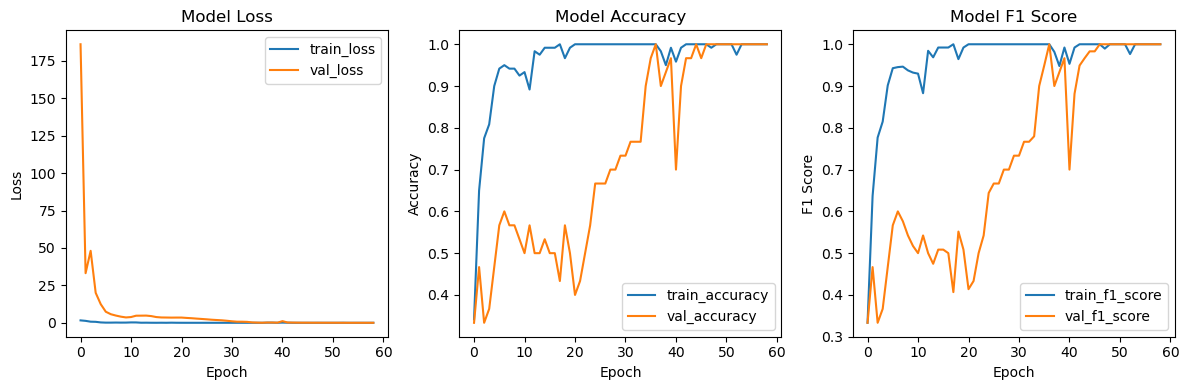

In [11]:
plot_metrics(best_model.history)

# Correlated Binary Encoding

In [ ]:
#FIXME - update the directories to point where you would like
image_directory = "/mnt/sda1/image-results-iris-correlated"
new_dir = image_directory + '/data/'

In [12]:
correlated_order = order_columns_by_correlation(df, classification_id, True)

ordering columns by correlation: Species, 6, ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [13]:
correlated_df = df.reindex(columns=correlated_order)

In [14]:
x = correlated_df.drop([classification_id, 'Id'], axis=1)
Y = correlated_df[classification_id]
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (150, 4)
Y (150,)
This value should be True: True


In [15]:
# FIXME - update the image directory to point to a directory where you want the images to be saved. Create a folder there.
# Change any other constants you want to change
image_directory = "/mnt/sda1/image-results-iris-correlated"
feature_types = get_column_data_types(x)
# For feature_types, 0 = float, 1 = int, 2 = bool
print(feature_types)

[0, 0, 0, 0]


In [16]:
convert_samples_to_binary(x, correlated_df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

In [17]:
organize_photos_in_folders(image_directory, Y)

150
{'setosa': 50, 'versicolor': 50, 'virginica': 50}


In [ ]:
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

In [5]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.0021178958297241477, 'acc': 1.0, 'f1_m': 1.0, 'precision_m': 1.0, 'recall_m': 1.0, 'auc': 1.0, 'false_negatives': 0.0, 'false_positives': 0.0, 'true_negatives': 240.0, 'true_positives': 120.0, 'mean_absolute_error': 0.0013242868444649503, 'mean_squared_error': 0.00014281665536941546, 'val_loss': 0.3948760949075222, 'val_acc': 0.9199999928474426, 'val_f1_m': 0.9166101098060608, 'val_precision_m': 0.9199999928474426, 'val_recall_m': 0.9133333206176758, 'val_auc': 0.9108332991600037, 'val_false_negatives': 5.0, 'val_false_positives': 5.0, 'val_true_negatives': 55.0, 'val_true_positives': 25.0, 'val_mean_absolute_error': 0.06487068757414818, 'val_mean_squared_error': 0.051262075267732146, 'lr': 0.0023049999341310467}


In [6]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.000651675509288907, 'acc': 1.0, 'f1_m': 1.0, 'precision_m': 1.0, 'recall_m': 1.0, 'auc_4': 1.0, 'false_negatives_4': 0.0, 'false_positives_4': 0.0, 'true_negatives_4': 240.0, 'true_positives_4': 120.0, 'mean_absolute_error': 0.0004321309388615191, 'mean_squared_error': 3.8298953768389765e-06, 'val_loss': 0.05403872951865196, 'val_acc': 1.0, 'val_f1_m': 0.9830508232116699, 'val_precision_m': 1.0, 'val_recall_m': 0.9666666388511658, 'val_auc_4': 1.0, 'val_false_negatives_4': 1.0, 'val_false_positives_4': 0.0, 'val_true_negatives_4': 60.0, 'val_true_positives_4': 29.0, 'val_mean_absolute_error': 0.02872484177350998, 'val_mean_squared_error': 0.009663733653724194, 'lr': 0.01}


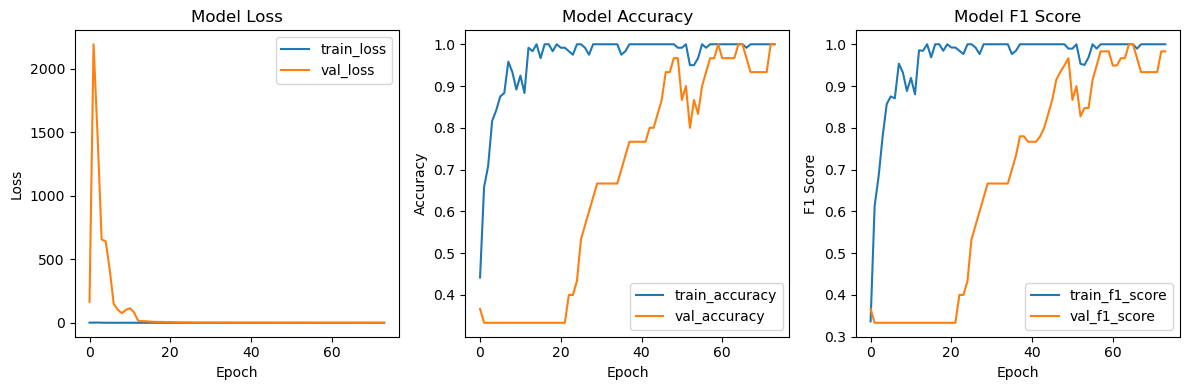

In [7]:
plot_metrics(best_model.history)

# DELETE after further experimentation

### Don't worry about this part!

In [19]:
import numpy as np
import matplotlib.pyplot as plt
def plots(ims, figsize=(12,6), rows=3, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)-10):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

2023-03-05 20:34:19.321912: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2023-03-05 20:34:19.321935: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/drake/miniconda3/lib/python3.8/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB

Found 150 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

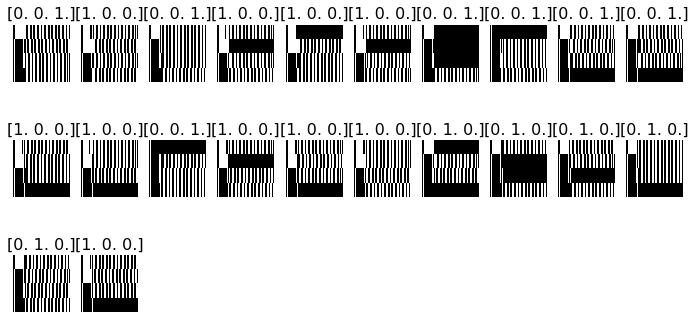

In [20]:
from keras_preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory( "/mnt/sda1/image-results-iris-correlated/data/Train",
                                                batch_size=32,class_mode='categorical')
imgs, labels = next(test_generator)
plots(imgs, titles=labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


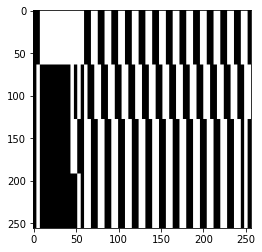

In [21]:
# print imgs[0] as an image
plt.imshow(imgs[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Found 150 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


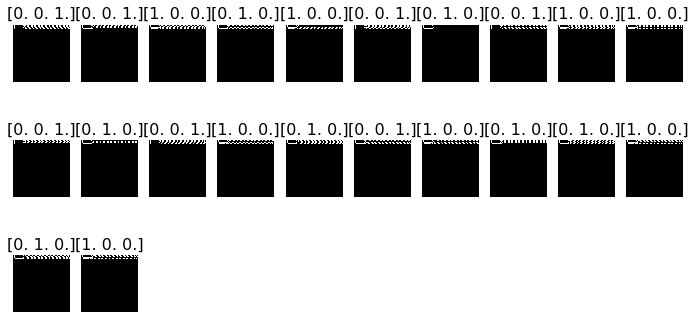

In [22]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory( "/mnt/sda1/image-results-iris/data/Train",target_size=(64,64),
                                                batch_size=32,class_mode='categorical')
imgs, labels = next(test_generator)
plots(imgs, titles=labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


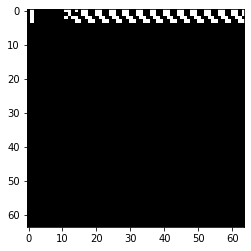

In [23]:
plt.imshow(imgs[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


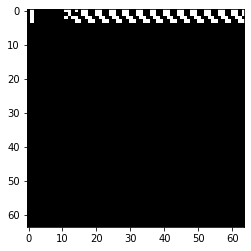

In [24]:
plt.imshow(imgs[0])

# TEST

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 1 images belonging to 1 classes.


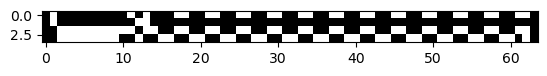

In [45]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory( "/mnt/sda1/image-results-iris/TEST",target_size=(4,64),
                                                batch_size=32,class_mode='categorical')
imgs, labels = next(test_generator)
plt.imshow(imgs[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 1 images belonging to 1 classes.


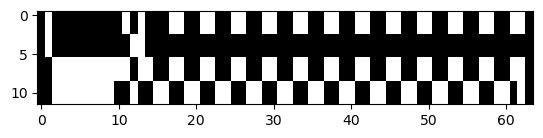

In [48]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory( "/mnt/sda1/image-results-iris/TEST",target_size=(12,64),
                                                batch_size=32,class_mode='categorical')
imgs, labels = next(test_generator)
plt.imshow(imgs[0])